In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve

In [2]:
df = pd.read_csv('cardio_data_processed.csv')
df.head() 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [3]:
df.shape 


(68205, 17)

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [5]:
df.isnull().sum()

id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

In [6]:
duplicates = df[df.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, age_years, bmi, bp_category, bp_category_encoded]
Index: []


In [ ]:
#creating a heat map
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

Text(0.5, 0, '0:non-smoker,1:smoker')

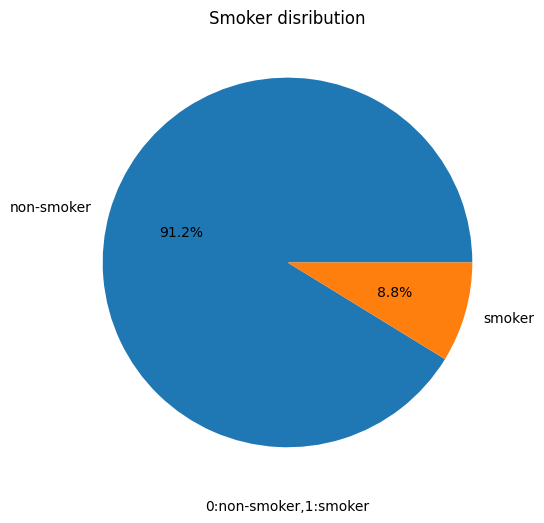

In [7]:
plt.figure(figsize=(10,6))
smoke=np.array(["non-smoker", "smoker"])
plt.pie(df['smoke'].value_counts(),autopct='%1.1f%%',labels=smoke)
plt.title("Smoker disribution")
plt.xlabel('0:non-smoker,1:smoker') 

c:\Users\tahur\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tahur\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tahur\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'No of people in each B.P Category')

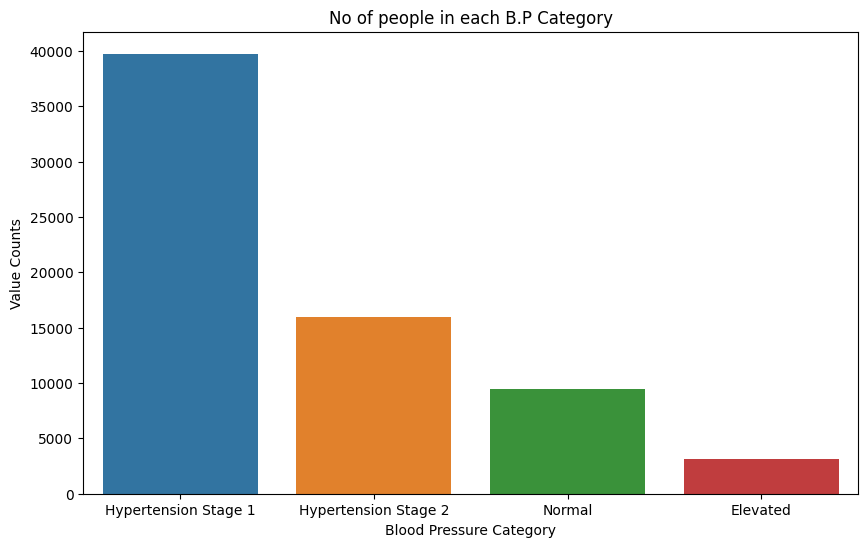

In [8]:
#plotting a countplot of No of people in each B.P Categories
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='bp_category')
plt.xlabel("Blood Pressure Category")
plt.ylabel("Value Counts")
plt.title("No of people in each B.P Category") 

c:\Users\tahur\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tahur\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tahur\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


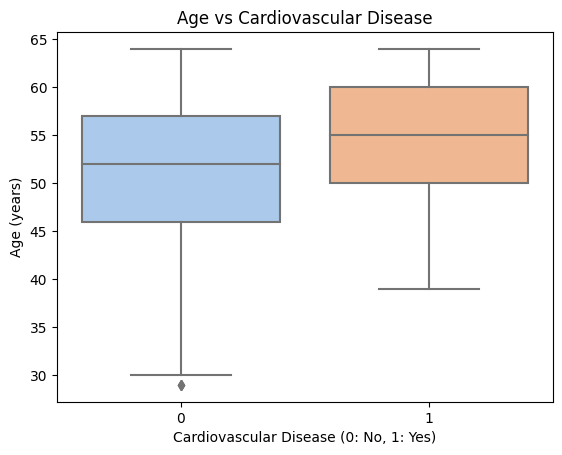

In [9]:
sns.boxplot(x=df['cardio'], y=df['age_years'], palette='pastel')
plt.title('Age vs Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
plt.ylabel('Age (years)')
plt.show() 

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
df.bp_category = le.fit_transform(df.bp_category)
df.head(10) 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,3,Normal
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,60,29.384676,1,Hypertension Stage 1
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,60,37.729725,1,Hypertension Stage 1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,61,29.983588,1,Hypertension Stage 1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,48,28.440955,3,Normal
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,54,25.282570,3,Normal


In [13]:
X=df.drop(columns=['cardio','bp_category_encoded'],axis=1)
y=df['cardio']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
scaler.fit(X_train)

StandardScaler()

In [17]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [18]:
print(X_train)

[[ 1.14607329  1.35428177  1.36791265 ...  1.35604735 -0.68249969
  -0.58963928]
 [-1.43052048 -0.24494047 -0.73104083 ... -0.26726292  0.16584422
   0.68272795]
 [-1.4364146   0.98877995 -0.73104083 ...  1.06090003 -0.38920495
  -0.58963928]
 ...
 [-0.01146099 -1.16132598 -0.73104083 ... -1.15270489  0.21363941
   0.68272795]
 [-0.15666417  0.18856169 -0.73104083 ...  0.17545806  0.04041753
   0.68272795]
 [ 0.53256556 -2.00566351 -0.73104083 ... -2.03814686  1.73941483
  -0.58963928]]


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [21]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC( probability=True)
}

In [22]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test,model.predict_proba(X_test)[:, 1])
    
    results.append([name, accuracy, roc_auc])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC AUC"])
results_df

,Model,Accuracy,ROC AUC
0,Logistic Regression,0.732058,0.795602
1,Decision Tree,0.633971,0.633941
2,Random Forest,0.722894,0.788425
3,Gradient Boosting,0.737849,0.804818
4,Support Vector Machine,0.738142,0.791440
